In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset
data = pd.DataFrame({
    "values": [10, 12, 12, 13, 12, 11, 12, 13, 100]  # 100 is an outlier
})

/home/ayushz/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/ayushz/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
data.describe()

,values
count,9.000000
mean,21.666667
std,29.389624
min,10.000000
25%,12.000000
50%,12.000000
75%,13.000000
max,100.000000


In [4]:

# --- Detect Outliers using IQR ---
Q1 = data["values"].quantile(0.25)
Q3 = data["values"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data["values"] < lower_bound) | (data["values"] > upper_bound)]
print("\nDetected Outliers:\n", outliers)


Detected Outliers:
    values
0      10
8     100


In [5]:


# --- Fixing Outliers (capping method) ---
data_fixed = data.copy()
data_fixed["values"] = np.where(
    data_fixed["values"] > upper_bound, upper_bound,
    np.where(data_fixed["values"] < lower_bound, lower_bound, data_fixed["values"])
)

print("\nData After Fixing Outliers:\n", data_fixed)


Data After Fixing Outliers:
    values
0    10.5
1    12.0
2    12.0
3    13.0
4    12.0
5    11.0
6    12.0
7    13.0
8    14.5


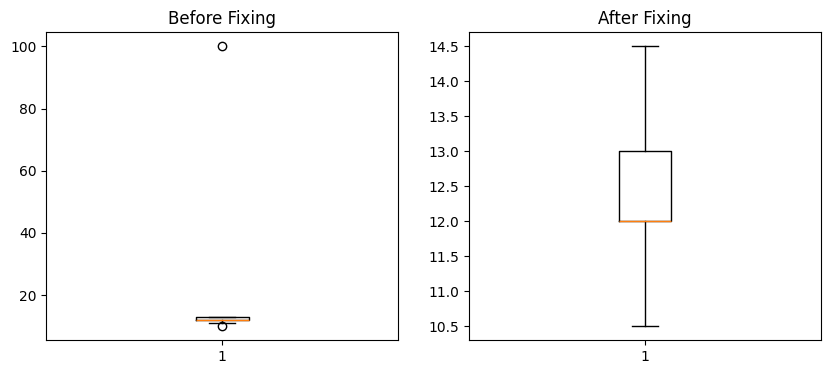

In [6]:
# --- Visualization ---
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.boxplot(data["values"])
plt.title("Before Fixing")

plt.subplot(1,2,2)
plt.boxplot(data_fixed["values"])
plt.title("After Fixing")

plt.show()